# **Data Exploration and Preparation**
The code segment loads the Iris dataset and transforms it into a pandas DataFrame, facilitating exploratory data analysis. It conducts essential tasks such as examining the dataset's structure, summarizing statistics, checking for missing values, and visualizing the distribution of target labels. These steps are crucial for comprehensively understanding the dataset and preparing it for subsequent machine learning tasks.


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Loading the Iris dataset
iris = datasets.load_iris()

# Convert the dataset into a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable to the DataFrame
iris_df['target'] = iris.target

# Explore the structure of the dataset
print("Dataset structure:")
print(tabulate(iris_df.head(), headers='keys', tablefmt='pretty'))

# Summary statistics
print("\nSummary statistics:")
print(tabulate(iris_df.describe(), headers='keys', tablefmt='pretty'))

# Check for missing values
missing_values = iris_df.isnull().sum().reset_index()
missing_values.columns = ['Feature', 'Missing Values']
print("\nMissing values:")
print(tabulate(missing_values, headers='keys', tablefmt='pretty'))

# Visualize the distribution of target labels
target_counts = iris_df['target'].value_counts().reset_index()
target_counts.columns = ['Target', 'Count']
print("\nDistribution of Target Labels:")
print(tabulate(target_counts, headers='keys', tablefmt='pretty'))

Dataset structure:
+---+-------------------+------------------+-------------------+------------------+--------+
|   | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | target |
+---+-------------------+------------------+-------------------+------------------+--------+
| 0 |        5.1        |       3.5        |        1.4        |       0.2        |  0.0   |
| 1 |        4.9        |       3.0        |        1.4        |       0.2        |  0.0   |
| 2 |        4.7        |       3.2        |        1.3        |       0.2        |  0.0   |
| 3 |        4.6        |       3.1        |        1.5        |       0.2        |  0.0   |
| 4 |        5.0        |       3.6        |        1.4        |       0.2        |  0.0   |
+---+-------------------+------------------+-------------------+------------------+--------+

Summary statistics:
+-------+-------------------+--------------------+--------------------+--------------------+--------------------+
|       |

# **Visualization of Feature Distributions**

This code segment utilizes seaborn and matplotlib libraries to visualize the distribution of features in the Iris dataset. It creates a 2x2 grid of histograms, with each subplot representing the distribution of a specific feature.


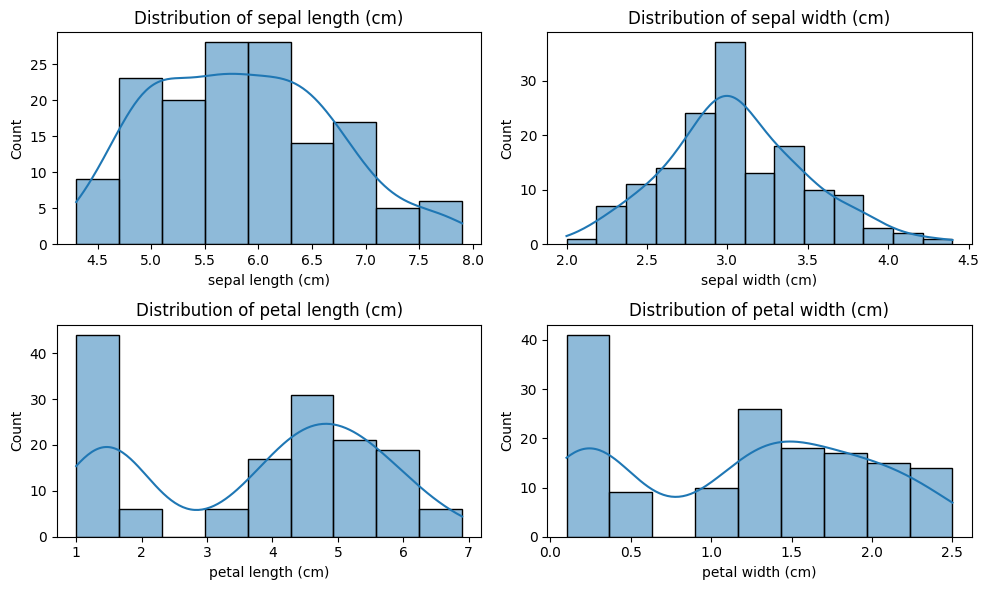

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization of Feature Distributions
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=iris_df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


# **Pairwise Feature Relationships**

The below code segment employs seaborn's pairplot function to visualize pairwise relationships between features in the Iris dataset. Each scatterplot matrix cell displays the relationship between two features. By examining these pairwise relationships, patterns and correlations between features can be observed, aiding in feature selection and understanding of the dataset's underlying structure.


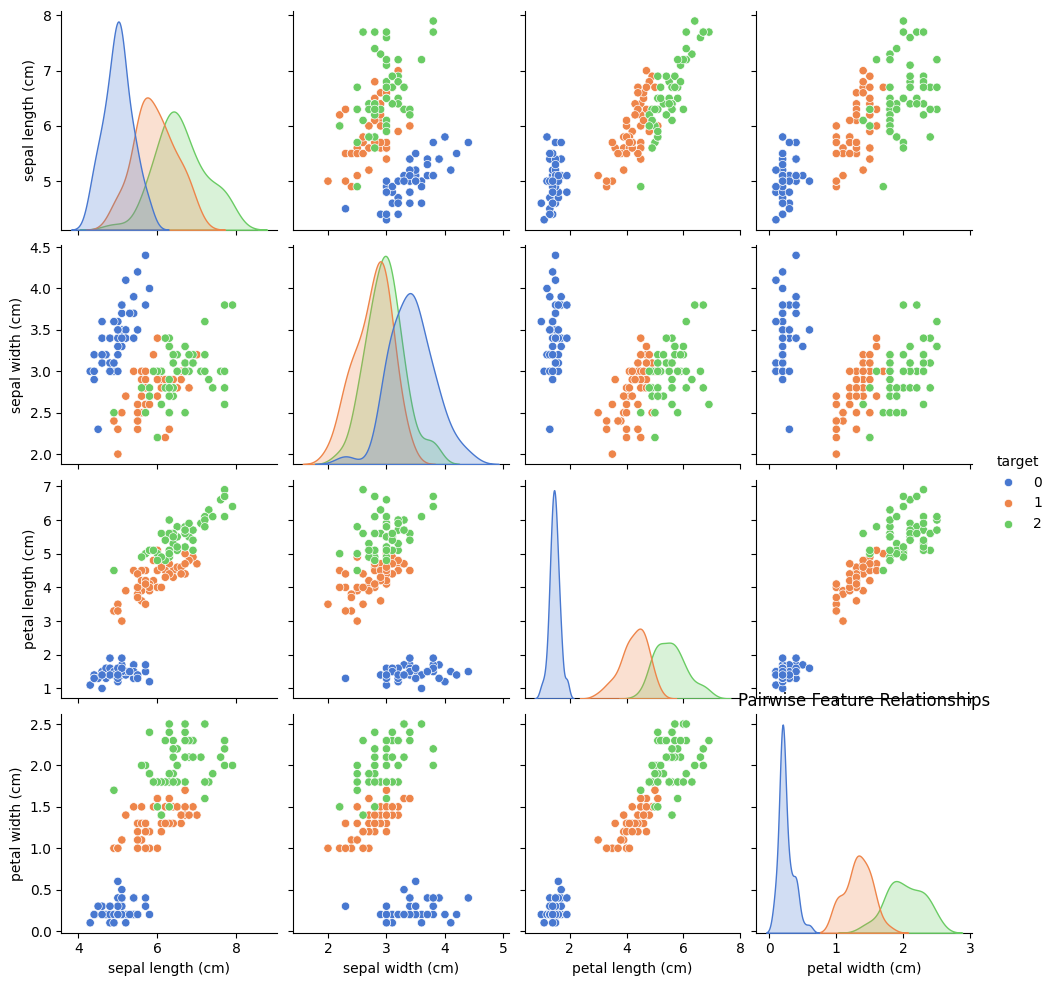

In [5]:
# Pairwise Feature Relationships
sns.pairplot(iris_df, hue='target', palette='muted')
plt.title('Pairwise Feature Relationships')
plt.show()


# **Outlier Detection**

This code segment generates scatter plots to visualize the relationship between each feature and the target variable in the Iris dataset. Each subplot represents one of the four features, marked with different markers for each class. These scatter plots help identify outliers and understand the distribution of each feature across different target classes.


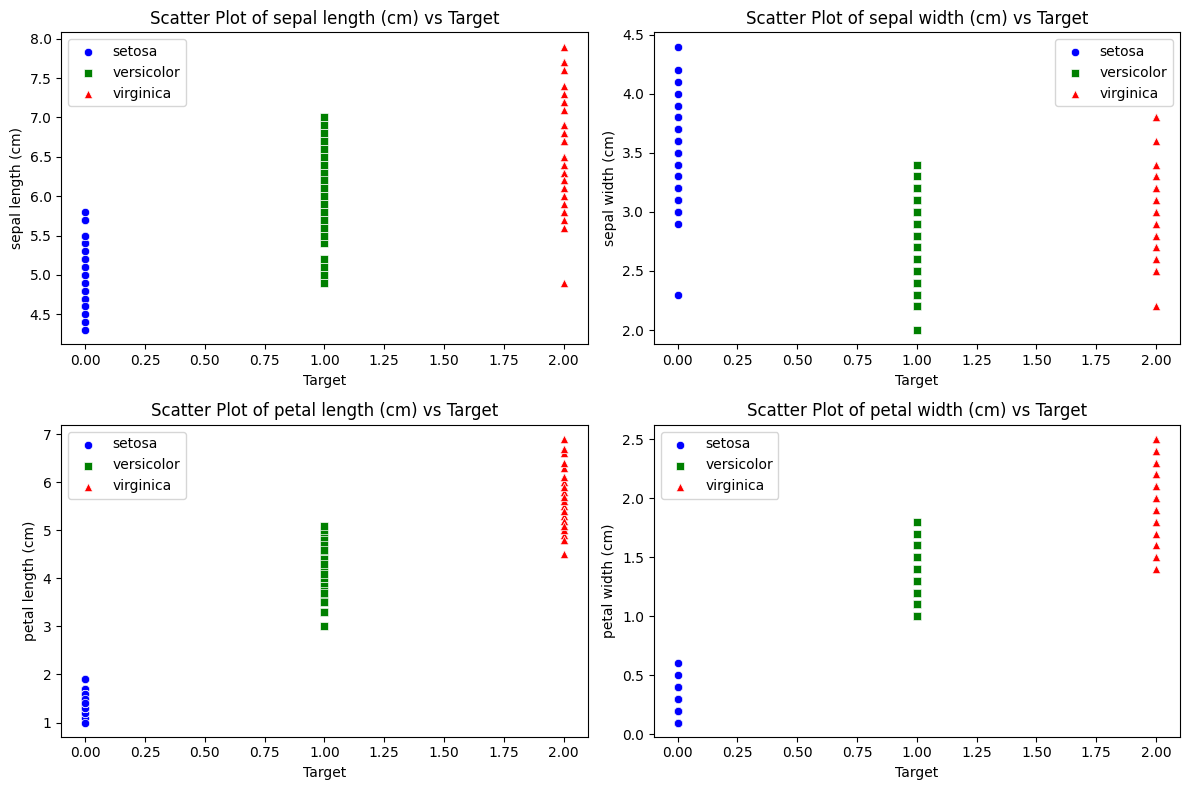

In [6]:
# Define colors and markers for different target classes
colors = ['blue', 'green', 'red']
markers = ['o', 's', '^']

# Outlier Detection with Beautified Scatter Plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    for target in range(3):
        sns.scatterplot(data=iris_df[iris_df['target'] == target], x='target', y=feature, color=colors[target], marker=markers[target], label=iris.target_names[target])
    plt.title(f'Scatter Plot of {feature} vs Target')
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.legend()
plt.tight_layout()
plt.show()

# **SVM Classification with Different Kernels**

This code trains Support Vector Machine (SVM) models with three different kernel functions (linear, polynomial, and RBF) on the Iris dataset, considering only the first two features (sepal length and sepal width) for visualization purposes. It scales the features using StandardScaler and then trains SVM models with each kernel configuration. Decision boundaries are plotted for each model to visualize how they classify the data points. The decision boundaries help understand the model's ability to separate different classes in the feature space, providing insights into the effectiveness of different kernel functions for classification tasks.


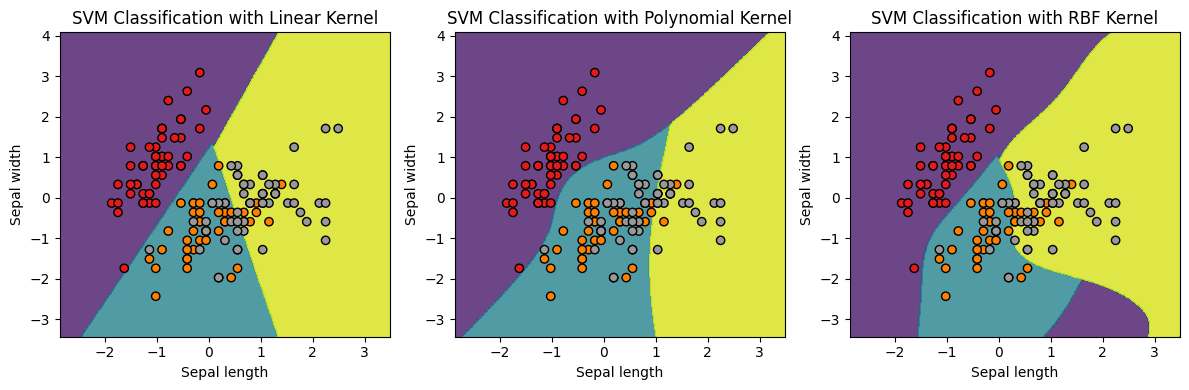

In [10]:
from sklearn.preprocessing import StandardScaler

X = iris.data[:, :2]  # Considering only the first two features for visualization purposes
y = iris.target

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train SVM model with linear kernel
svm_linear = SVC(kernel='linear', C=5.0)
svm_linear.fit(X, y)

# Train SVM model with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=5.0)
svm_poly.fit(X, y)

# Train SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='auto', C=5.0)
svm_rbf.fit(X, y)

# Create meshgrid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Plot decision boundaries
plt.figure(figsize=(12, 4))

# Plot decision boundary for linear kernel
plt.subplot(1, 3, 1)
Z_linear = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
plt.contourf(xx, yy, Z_linear, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Classification with Linear Kernel')

# Plot decision boundary for polynomial kernel
plt.subplot(1, 3, 2)
Z_poly = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)
plt.contourf(xx, yy, Z_poly, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Classification with Polynomial Kernel')

# Plot decision boundary for RBF kernel
plt.subplot(1, 3, 3)
Z_rbf = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)
plt.contourf(xx, yy, Z_rbf, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Classification with RBF Kernel')

plt.tight_layout()
plt.show()


# **SVM Model Evaluation with K-fold Cross-Validation**

This code segment evaluates Support Vector Machine (SVM) models with different configurations using K-fold cross-validation. It iterates over each SVM configuration specified in `svm_configurations`, which includes the choice of kernel and regularization parameter `C`. For each configuration, it performs K-fold cross-validation with `k` folds, shuffling the data before splitting. The mean accuracy of each configuration is computed and printed along with the cross-validation scores for each fold. This approach provides a robust assessment of model performance across different hyperparameter settings.


In [7]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

X = iris.data
y = iris.target

# Define the list of SVM configurations to experiment with
svm_configurations = [
    {'kernel': 'linear', 'C': 5.0},
    {'kernel': 'poly', 'C': 5.0, 'degree': 2},
    {'kernel': 'rbf', 'C': 5.0, 'gamma': 'scale'}
]

# Define the number of folds for K-fold cross-validation
k = 5

# Initialize KFold cross-validation with shuffling
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Loop through each SVM configuration
for config in svm_configurations:
    kernel = config['kernel']
    C = config['C']

    # Initialize list to store cross-validation scores
    cv_scores = []

    # Loop through each K-fold split
    for train_index, test_index in kf.split(X):
        X_train_k, X_test = X[train_index], X[test_index]
        y_train_k, y_test = y[train_index], y[test_index]

        if 'degree' in config and kernel == 'poly':
            degree = config['degree']
            svm_model = SVC(kernel=kernel, C=C, degree=degree)
        elif 'gamma' in config and kernel == 'rbf':
            gamma = config['gamma']
            svm_model = SVC(kernel=kernel, C=C, gamma=gamma)
        else:
            svm_model = SVC(kernel=kernel, C=C)

        # Train SVM model and calculate accuracy
        svm_model.fit(X_train_k, y_train_k)
        accuracy = svm_model.score(X_test, y_test)
        cv_scores.append(accuracy)

    # Print the cross-validation scores
    print(f"Evaluating SVM with {kernel} kernel, C={C}:")
    print("Cross-validation scores:", cv_scores)
    print("Mean accuracy:", np.mean(cv_scores))
    print("-------------------------------------------")


Evaluating SVM with linear kernel, C=5.0:
Cross-validation scores: [0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 1.0]
Mean accuracy: 0.9666666666666666
-------------------------------------------
Evaluating SVM with poly kernel, C=5.0:
Cross-validation scores: [1.0, 1.0, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667]
Mean accuracy: 0.9733333333333334
-------------------------------------------
Evaluating SVM with rbf kernel, C=5.0:
Cross-validation scores: [1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
Mean accuracy: 0.9800000000000001
-------------------------------------------


# **SVM Model Evaluation with Stratified K-Fold Cross-Validation**

This code segment SVM models with different kernels (linear, polynomial, and RBF) using Stratified K-Fold Cross-Validation. It initializes a `StratifiedKFold` object with 5 folds to ensure balanced class distribution in each fold. Then, it performs cross-validation for each kernel separately, training and evaluating the SVM model on each fold. The mean accuracy is computed for each kernel, providing insights into their performance across different data splits. This approach helps assess the robustness of SVM models with various kernel functions.


In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


# Initialize StratifiedKFold with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)

# Initialize lists to store accuracies for each kernel
accuracies_linear = []
accuracies_poly = []
accuracies_rbf = []

# Perform stratified k-fold cross-validation for each kernel
for train_index, test_index in skf.split(X, y):

    # Train SVM model with linear kernel
    svm_model_linear = SVC(kernel='linear', C=5.0)
    svm_model_linear.fit(X_train_k, y_train_k)
    y_pred_linear = svm_model_linear.predict(X_test)
    accuracy_linear = accuracy_score(y_test, y_pred_linear)
    accuracies_linear.append(accuracy_linear)

    # Train SVM model with polynomial kernel
    svm_model_poly = SVC(kernel='poly', degree=3, C=5.0)
    svm_model_poly.fit(X_train_k, y_train_k)
    y_pred_poly = svm_model_poly.predict(X_test)
    accuracy_poly = accuracy_score(y_test, y_pred_poly)
    accuracies_poly.append(accuracy_poly)

    # Train SVM model with RBF kernel
    svm_model_rbf = SVC(kernel='rbf', gamma='auto', C=5.0)
    svm_model_rbf.fit(X_train_k, y_train_k)
    y_pred_rbf = svm_model_rbf.predict(X_test)
    accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
    accuracies_rbf.append(accuracy_rbf)

# Calculate mean accuracy for each kernel
mean_accuracy_linear = np.mean(accuracies_linear)
mean_accuracy_poly = np.mean(accuracies_poly)
mean_accuracy_rbf = np.mean(accuracies_rbf)

print("Mean Accuracy with Stratified k-Fold Cross-Validation (Linear Kernel):", mean_accuracy_linear)
print("Mean Accuracy with Stratified k-Fold Cross-Validation (Polynomial Kernel):", mean_accuracy_poly)
print("Mean Accuracy with Stratified k-Fold Cross-Validation (RBF Kernel):", mean_accuracy_rbf)


Mean Accuracy with Stratified k-Fold Cross-Validation (Linear Kernel): 1.0
Mean Accuracy with Stratified k-Fold Cross-Validation (Polynomial Kernel): 0.9666666666666666
Mean Accuracy with Stratified k-Fold Cross-Validation (RBF Kernel): 0.9666666666666666


# **SVM Model Evaluation with Classification Report Visualization**

This code defines a function `evaluate_svm_model` to train an SVM model with a specified kernel and evaluate its performance using a classification report. The classification report is generated using the `classification_report` function from scikit-learn, and the results are visualized as a heatmap using seaborn. Each heatmap represents the precision, recall, and F1-score metrics for each class in the dataset. The function is then applied to evaluate SVM models with different kernels (linear, polynomial, and RBF) configured earlier, providing insights into their classification performance across different classes.


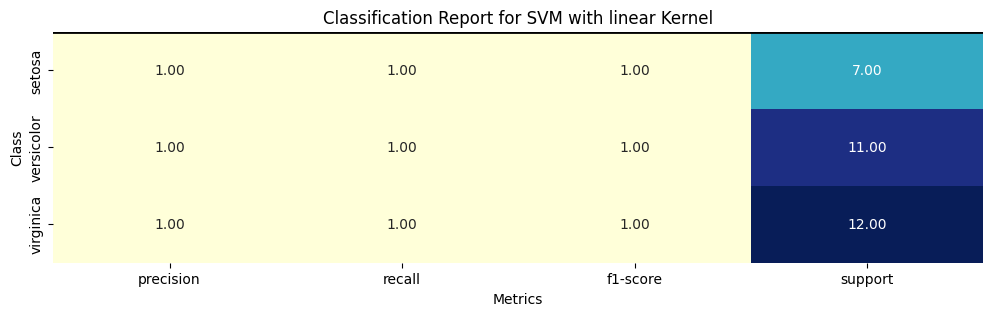

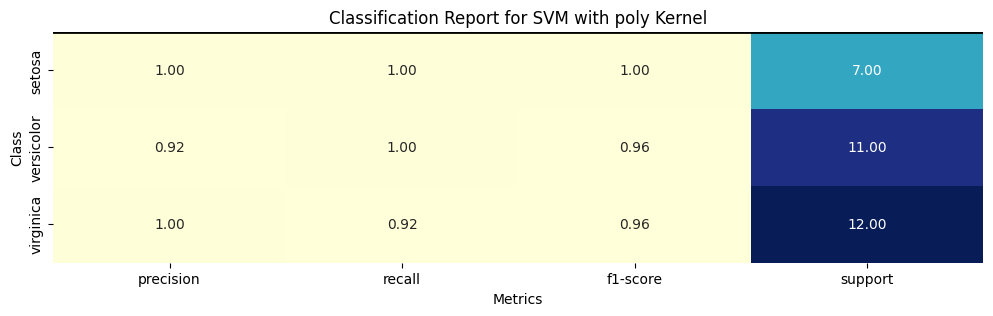

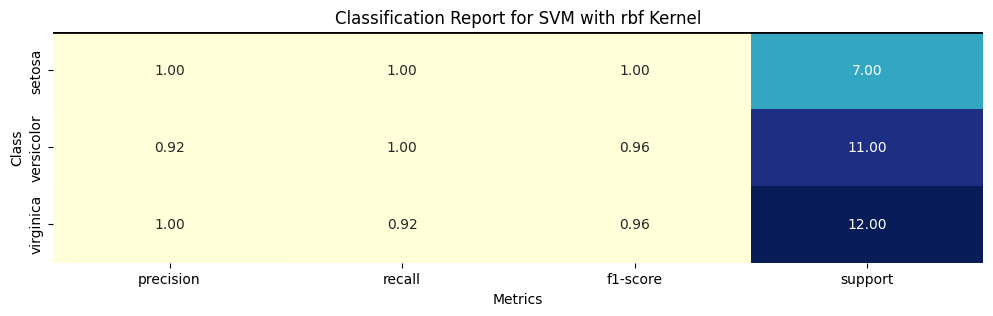

In [9]:
from sklearn.metrics import classification_report

# Define function to evaluate SVM model and print classification report
def evaluate_svm_model(X_train_k, y_train_k, X_test, y_test, svm_model, kernel_name):
    # Train the SVM model
    svm_model.fit(X_train_k, y_train_k)

    # Predict labels on test data
    y_pred = svm_model.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)

    # Convert the classification report to a DataFrame
    df_report = pd.DataFrame(report).transpose()

    # Plot the heatmap
    plt.figure(figsize=(12, len(df_report) * 0.5))
    sns.heatmap(df_report.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0), annot=True, cmap='YlGnBu', fmt=".2f", cbar=False)
    plt.title(f'Classification Report for SVM with {kernel_name} Kernel')
    plt.xlabel('Metrics')
    plt.ylabel('Class')
    plt.axhline(y=0, color='black', linewidth=2)
    plt.axhline(y=len(df_report), color='black', linewidth=2)
    plt.show()

# Evaluate SVM model for each configuration
for config in svm_configurations:
    kernel = config['kernel']
    C = config['C']
    if 'degree' in config and kernel == 'poly':
        degree = config['degree']
        svm_model = SVC(kernel=kernel, C=C, degree=degree)
    elif 'gamma' in config and kernel == 'rbf':
        gamma = config['gamma']
        svm_model = SVC(kernel=kernel, C=C, gamma=gamma)
    else:
        svm_model = SVC(kernel=kernel, C=C)

    # Evaluate SVM model and print classification report
    evaluate_svm_model(X_train_k, y_train_k, X_test, y_test, svm_model, kernel)


# **Learning Curve Analysis for SVM Model**

This code scales the features using StandardScaler and defines a function `plot_learning_curves()` to visualize the learning curves of an SVM model. Learning curves provide insights into how the model's performance changes with the number of training examples. The function plots both training and cross-validation scores against the number of training examples, along with shaded areas representing the standard deviation. It helps assess if the model suffers from high bias or high variance and guides in optimizing the model's performance.


In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Scale the features
scaler = StandardScaler()
X_train_k = scaler.fit_transform(X_train_k)
X_test = scaler.transform(X_test)

# Define a function to plot learning curves
def plot_learning_curves(model, X_train_k, y_train_k):
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, X_train_k, y_train_k, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curves")
    plt.legend(loc="best")
    plt.show()

# Define SVM model
best_svm_model = SVC(kernel='linear', C=5.0)
best_svm_model.fit(X_train_k, y_train_k)
y_pred = best_svm_model.predict(X_test)

# Define target names
target_names = iris.target_names



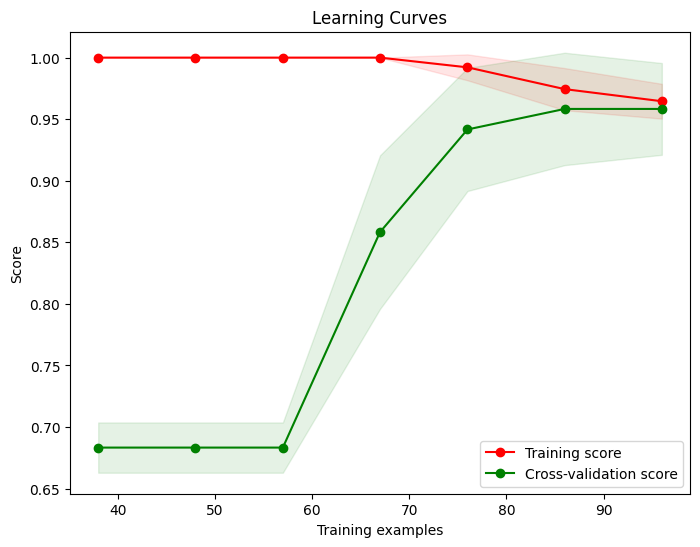

In [12]:
# Plot learning curves
plot_learning_curves(best_svm_model, X_train_k, y_train_k)

# **Confusion Matrix Plotting**

This code defines a function `plot_conf_matrix_custom()` to visualize the confusion matrix using matplotlib. The confusion matrix is a useful tool for evaluating the performance of a classification model by displaying the counts of true positive, true negative, false positive, and false negative predictions. Each cell of the heatmap contains the count of observations where the true label (row) matches the predicted label (column). The function enhances interpretability by displaying the count values within each cell, allowing for easy assessment of classification performance across different target classes.


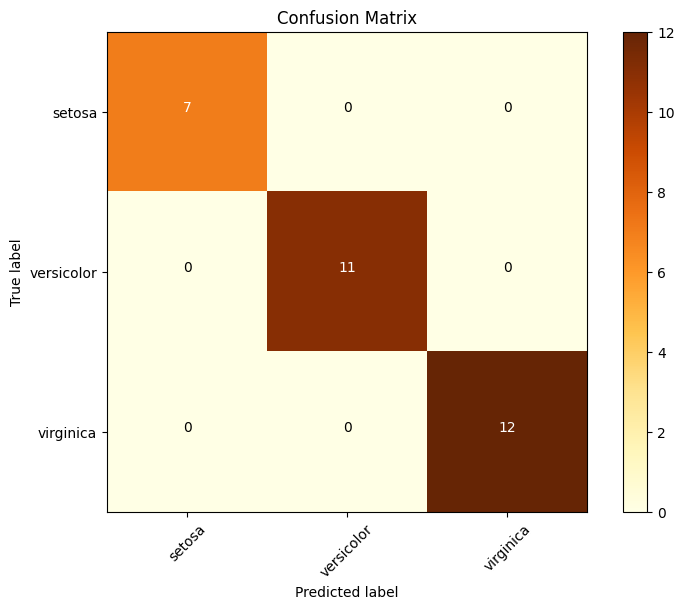

In [13]:
# Define a function to plot confusion matrix using matplotlib
def plot_conf_matrix_custom(y_true, y_pred, target_names, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.YlOrBr)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    for i in range(len(target_names)):
        for j in range(len(target_names)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

# Plot confusion matrix
plot_conf_matrix_custom(y_test, y_pred, iris.target_names)
